In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
def get_pca_tsne(df_values, n_components=2, perplexity=30):

    # PCA
    pca_instance = PCA(n_components=n_components, random_state=42)
    pca_transform = pca_instance.fit_transform(df_values.values)
    df_pca = pd.DataFrame(data=pca_transform, columns=["p0", "p1"])
    
    # t-SNE
    tsne_transform = TSNE(n_components=n_components, perplexity=perplexity, random_state=42).fit_transform(df_values.values)
    df_tsne = pd.DataFrame(data=tsne_transform, columns=["p0", "p1"])
    return df_pca, df_tsne

In [3]:
def processed_data(folder):
    folder_list = os.listdir(folder)
    dfs = []
    for property in folder_list:
        df_data = pd.read_csv(f"{folder}/{property}/coded_dataset.csv")
        df_data["property"] = property
        dfs.append(df_data)
    return pd.concat(dfs)

In [4]:
def generate_plots(df_results, hue_col, col_wrap, save_path, title):
    plt.figure(figsize=(12, 10))
    sns.relplot(
        data=df_results, 
        x="p0", y="p1", hue=hue_col, 
        col="property" if "property" in df_results.columns else "model", 
        col_wrap=col_wrap, kind="scatter"
    )
    plt.suptitle(title, y=1.02)
    plt.savefig(save_path)
    plt.show()
    plt.close()

In [5]:
def process_and_plot(folder, drop_columns, columns_encoder, response, save_prefix):
    results_pca = []
    results_tsne = []
    df_data = processed_data(folder)

    for encoder in df_data[columns_encoder].unique():
        df_filtered = df_data[df_data[columns_encoder] == encoder]
        df_values = df_filtered.drop(columns=drop_columns)

        df_pca, df_tsne = get_pca_tsne(df_values)
        
        df_pca[response] = df_filtered[response]
        df_pca[columns_encoder] = encoder
        df_tsne[response] = df_filtered[response]
        df_tsne[columns_encoder] = encoder

        results_pca.append(df_pca)
        results_tsne.append(df_tsne)
    
    df_pca_results = pd.concat(results_pca)
    df_tsne_results = pd.concat(results_tsne)

    generate_plots(df_pca_results, response, col_wrap=2, 
                   save_path=f"{save_prefix}_pca.png", title=f"PCA by {columns_encoder}")
    generate_plots(df_tsne_results, response, col_wrap=2, 
                   save_path=f"{save_prefix}_tsne.png", title=f"t-SNE by {columns_encoder}")

#### View representation of physicochemical properties

In [6]:
os.makedirs("../results/visualizations/", exist_ok=True)

<Figure size 1200x1000 with 0 Axes>

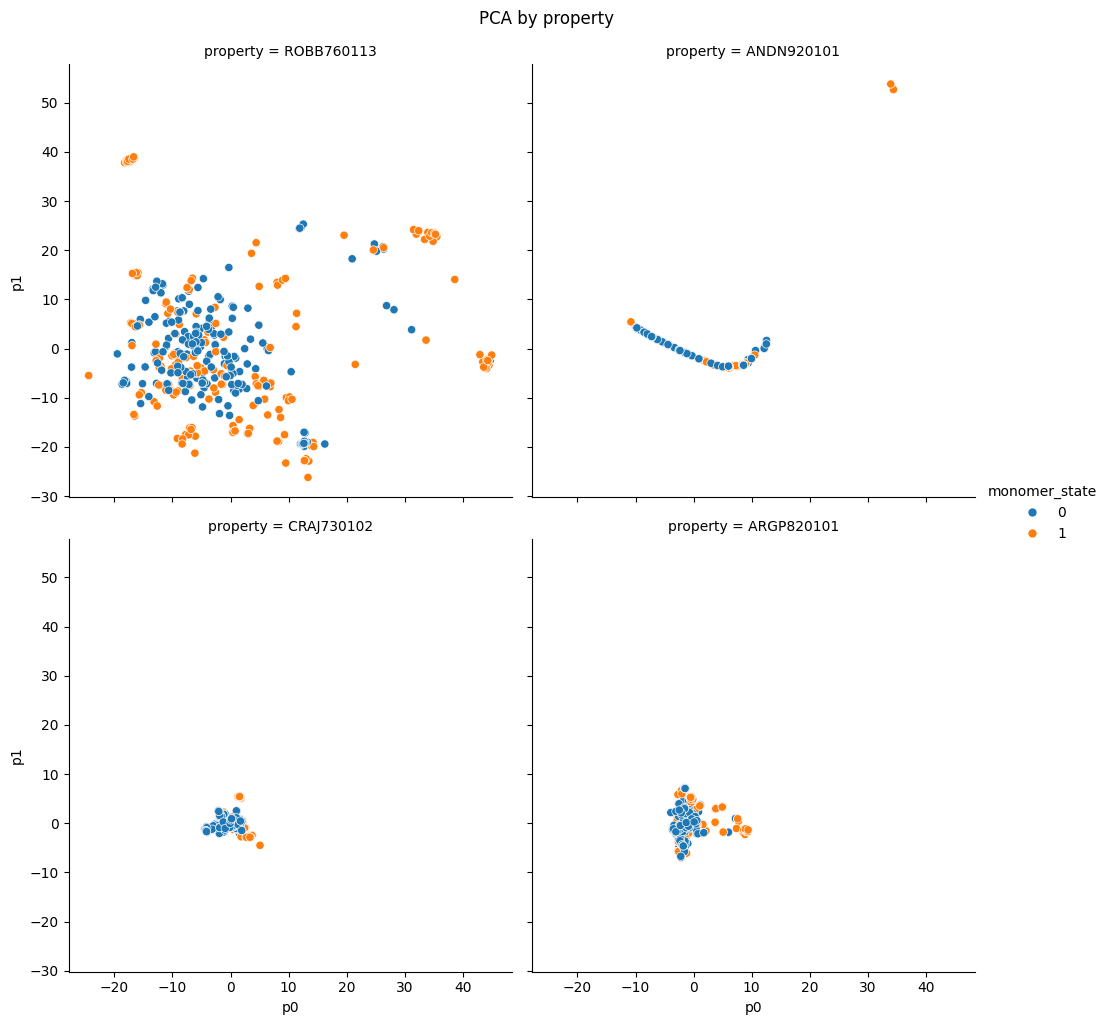

<Figure size 1200x1000 with 0 Axes>

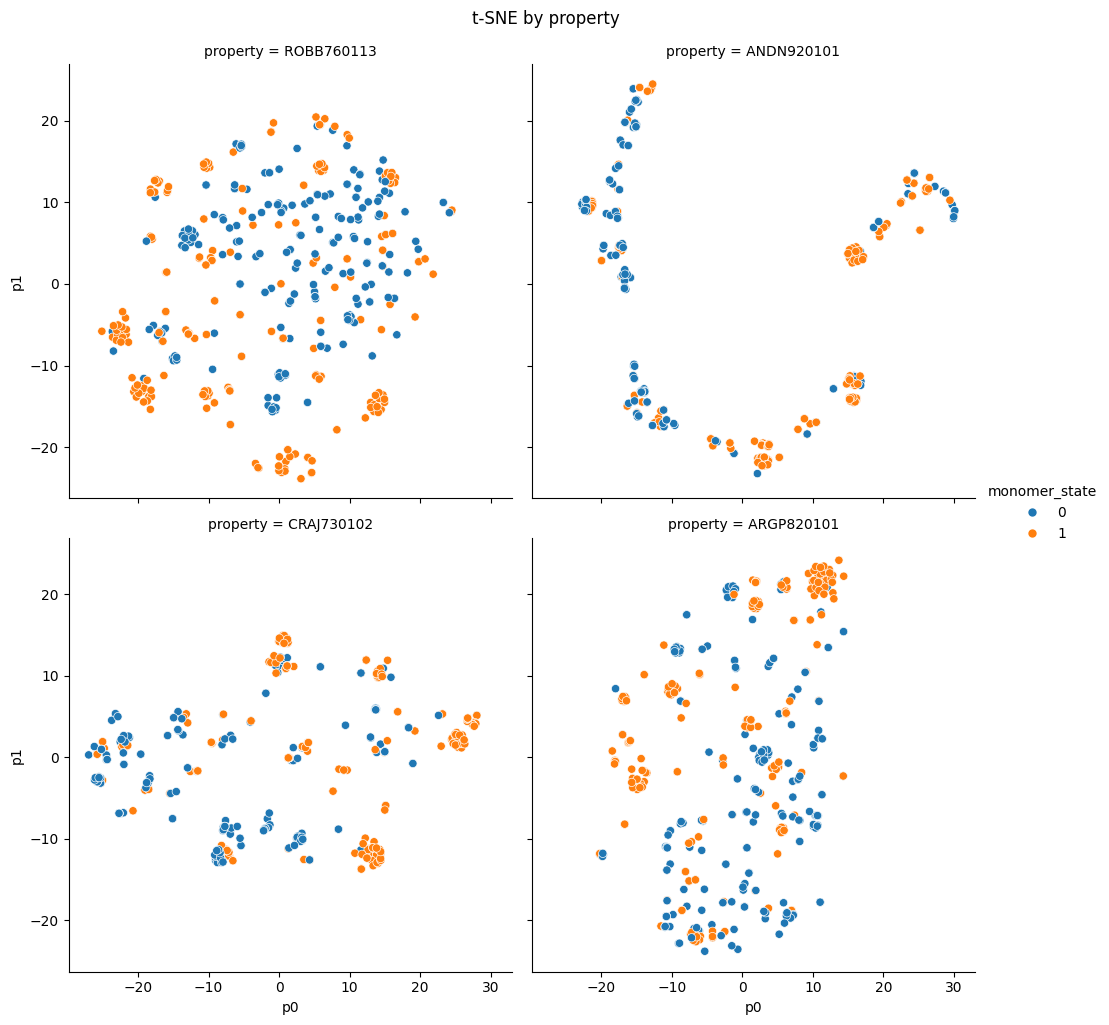

In [7]:
process_and_plot(
    folder="../results/encoders/physicochemical_properties", 
    drop_columns=["monomer_state", "property"], 
    columns_encoder="property", 
    response="monomer_state",
    save_prefix="../results/visualizations/plot_by_property"
)

#### View representation of FFT

<Figure size 1200x1000 with 0 Axes>

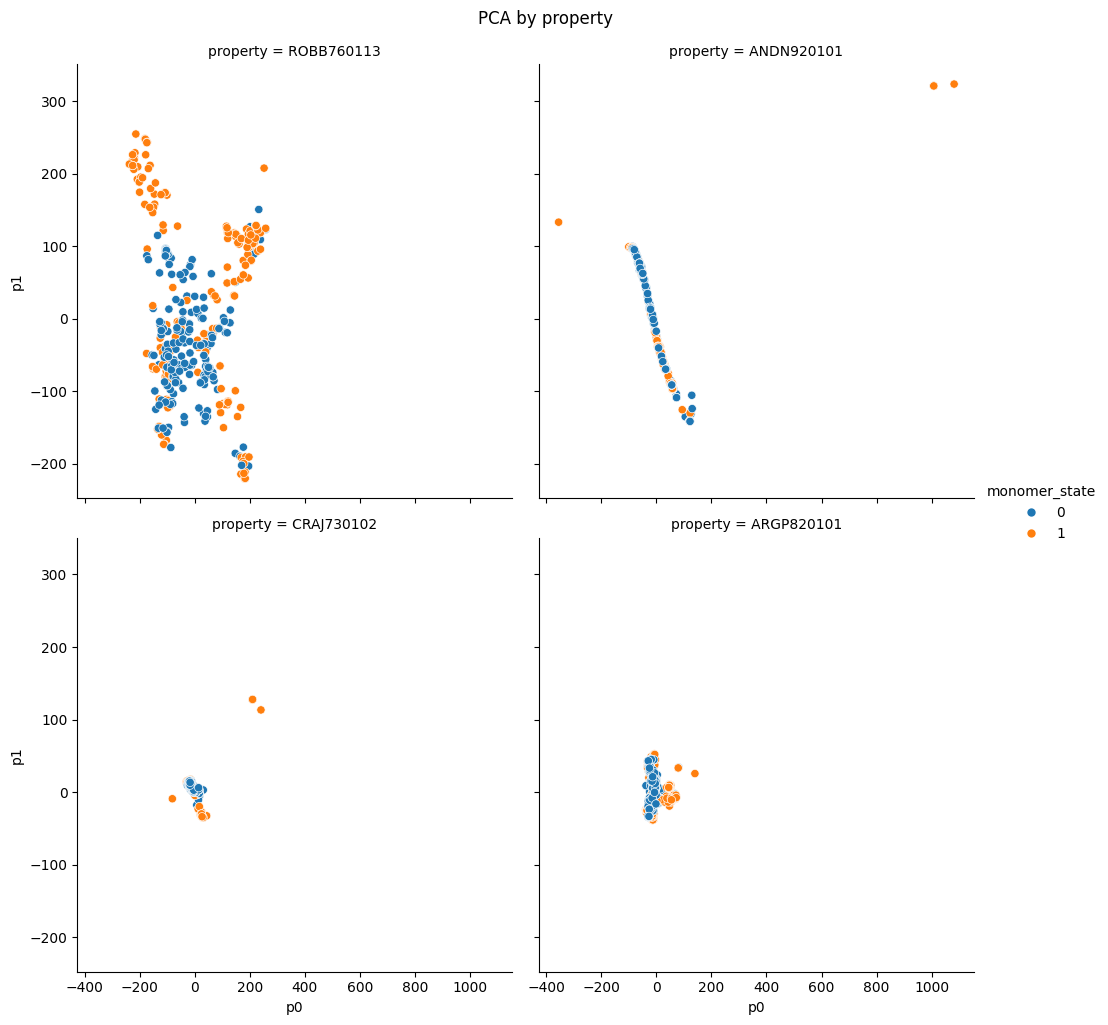

<Figure size 1200x1000 with 0 Axes>

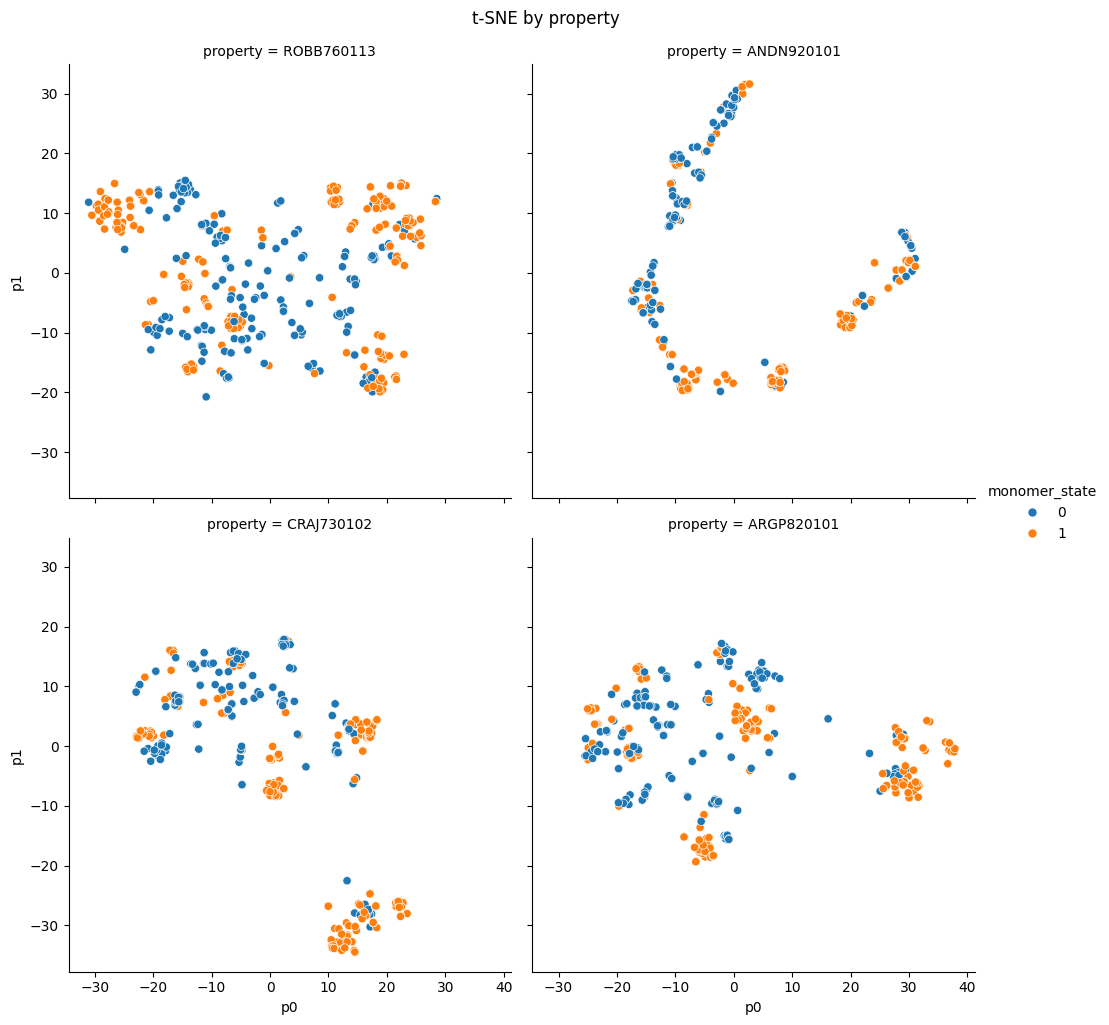

In [8]:
process_and_plot(
    folder="../results/encoders/FFT", 
    drop_columns=["monomer_state", "property"], 
    columns_encoder="property", 
    response="monomer_state",
    save_prefix="../results/visualizations/plot_by_FFT", 
)

#### View representation of embedding

<Figure size 1200x1000 with 0 Axes>

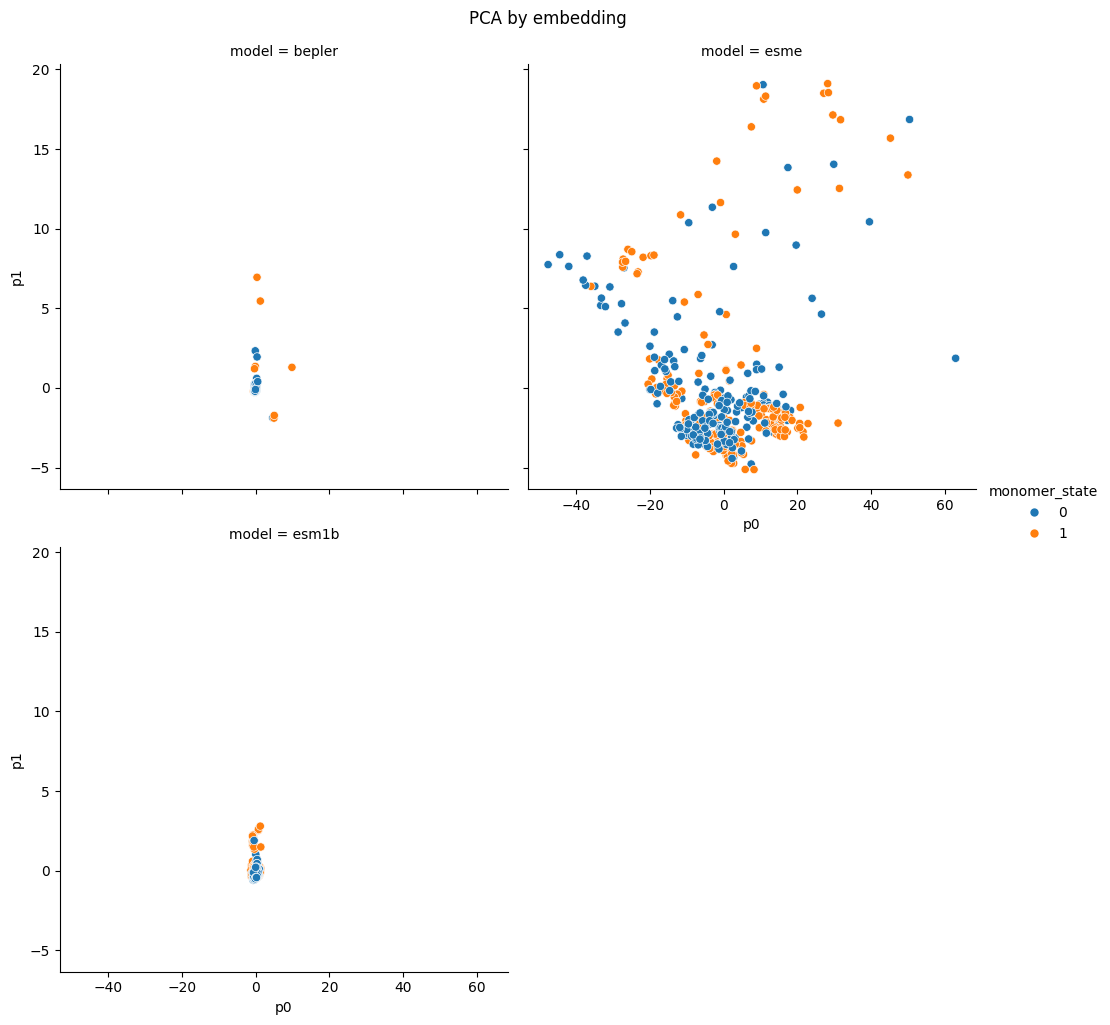

<Figure size 1200x1000 with 0 Axes>

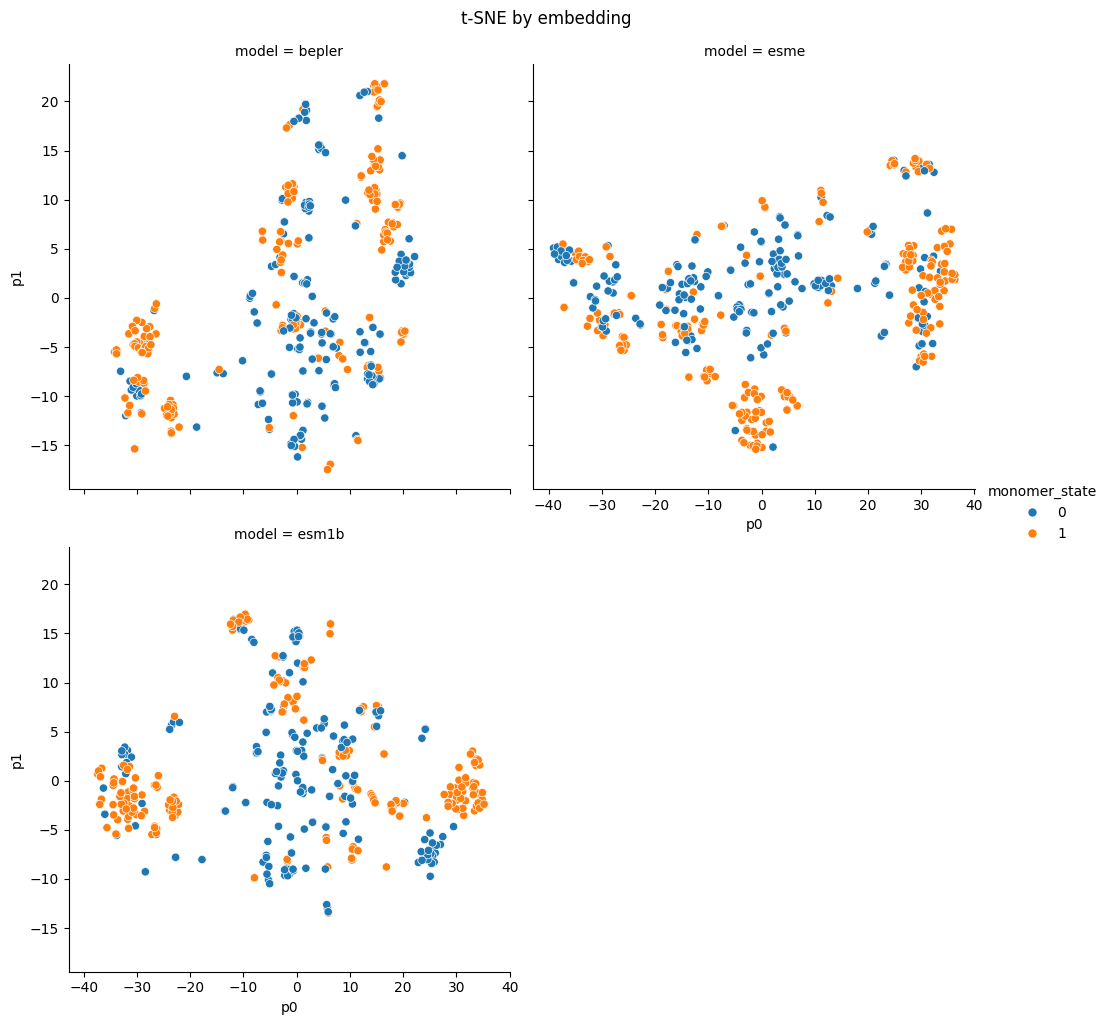

In [9]:
embedding_folder = "../results/encoders/embedding"
embedding_models = ["bepler", "esme", "esm1b"]
embedding_pca_results = []
embedding_tsne_results = []

for model in embedding_models:
    df_model = pd.read_csv(f"{embedding_folder}/{model}/coded_dataset.csv")
    df_values = df_model.drop(columns=["monomer_state"])
    df_pca, df_tsne = get_pca_tsne(df_values)
    df_pca["monomer_state"] = df_model["monomer_state"].values
    df_pca["model"] = model
    df_tsne["monomer_state"] = df_model["monomer_state"].values
    df_tsne["model"] = model
    embedding_pca_results.append(df_pca)
    embedding_tsne_results.append(df_tsne)

df_pca_embeddings = pd.concat(embedding_pca_results)
df_tsne_embeddings = pd.concat(embedding_tsne_results)

generate_plots(df_pca_embeddings, hue_col="monomer_state", col_wrap=2, 
               save_path="../results/visualizations/plot_by_embedding_pca.png", title="PCA by embedding")
generate_plots(df_tsne_embeddings, hue_col="monomer_state", col_wrap=2, 
               save_path="../results/visualizations/plot_by_embedding_tsne.png", title="t-SNE by embedding")

#### View representation of onehot

In [10]:
df_one_hot = pd.read_csv("../results/encoders/embedding/onehot/coded_dataset.csv")
df_one_hot["encoder"] = "one-hot"
df_values = df_one_hot.drop(columns=["monomer_state", "encoder"])

df_pca, df_tsne = get_pca_tsne(df_values)
df_pca["monomer_state"] = df_one_hot["monomer_state"].values
df_tsne["monomer_state"] = df_one_hot["monomer_state"].values

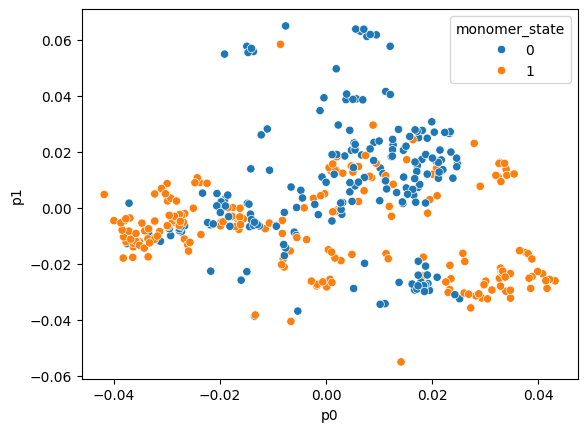

In [11]:
sns.scatterplot(data=df_pca, x="p0", y="p1", hue="monomer_state")
plt.savefig("../results/visualizations/plot_by_one-hot_pca.png")

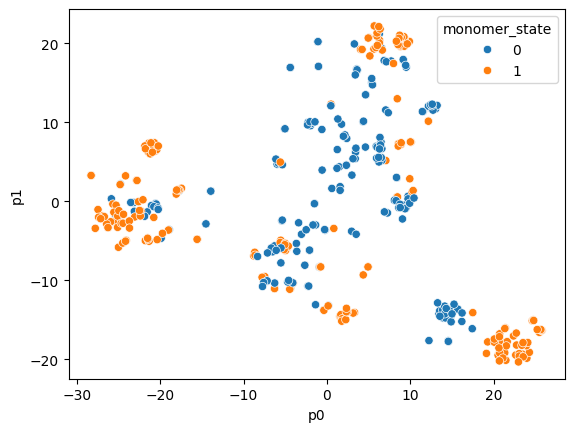

In [12]:
sns.scatterplot(data=df_tsne, x="p0", y="p1", hue="monomer_state")
plt.savefig("../results/visualizations/plot_by_one-hot_tsne.png")